In [1]:
!pip install -q timm

In [2]:
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.metrics import *
import torch
import timm

In [3]:
dls = ImageDataLoaders.from_folder(
    '/kaggle/input/road-transport-dataset/rtds',
    item_tfms=Resize(224),
    valid_pct=0.2,
    bs=32,
    seed=42
)

In [4]:
classes = dls.vocab
classes

['barricade', 'cctv', 'four_wheeler', 'pedestrian', 'stray_dog', 'traffic_light', 'traffic_police', 'traffic_sign', 'two_wheeler', 'zebra_crossing']

In [5]:
from timm.models import *
list_models('*resnet*')

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'eca_resnet33ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gcresnet33ts',
 'gcresnet50t',
 'inception_resnet_v2',
 'lambda_resnet26rpt_256',
 'lambda_resnet26t',
 'lambda_resnet50ts',
 'legacy_seresnet18',
 'legacy_seresnet34',
 'legacy_seresnet50',
 'legacy_seresnet101',
 'legacy_seresnet152',
 'nf_ecaresnet26',
 'nf_ecaresnet50',
 'nf_ecaresnet101',
 'nf_resnet26',
 'nf_resnet50',
 'nf_resnet101',
 'nf_seresnet26',
 'nf_seresnet50',
 'nf_seresnet101',
 'resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_clip',
 'resnet50_clip_gap',
 'resnet50_gn',
 'resnet50_mlp',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet50x4_clip',
 'resnet50x4_clip_gap',
 'resnet50x16_clip

In [6]:
learner = vision_learner(dls, 'resnet50', model_dir='/temp/models', metrics=[accuracy])

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [7]:
learner.to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.001737800776027143)

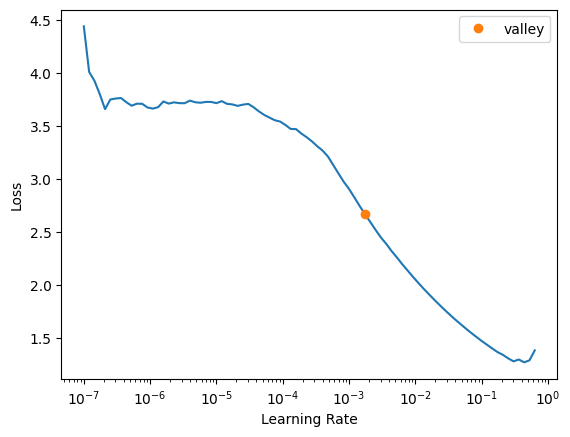

In [8]:
learner.lr_find()

In [9]:
learner.fine_tune(50, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.627427,8.876252,0.433333,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.104774,2.380416,0.566667,00:08
1,1.042723,2.260215,0.466667,00:07
2,0.963010,1.849563,0.566667,00:08
3,0.877632,1.542873,0.500000,00:07
4,0.734704,1.366847,0.600000,00:07
5,0.663707,1.991687,0.566667,00:08
6,0.609242,2.027684,0.633333,00:08
7,0.543669,1.834703,0.666667,00:08
8,0.486692,1.959131,0.666667,00:07
9,0.447182,2.087488,0.700000,00:07


In [11]:
learner.export("/kaggle/working/model.pkl")

In [19]:
!pip install fastai2_extensions

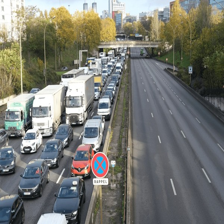

In [23]:
import PIL
image = '/kaggle/input/road-transport-dataset/rtds/four_wheeler/four_wheeler_11.jpg'
PIL.Image.open(image).resize((224, 224))

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
from fastai.vision.all import *
from fastai2_extensions.interpret.all import *

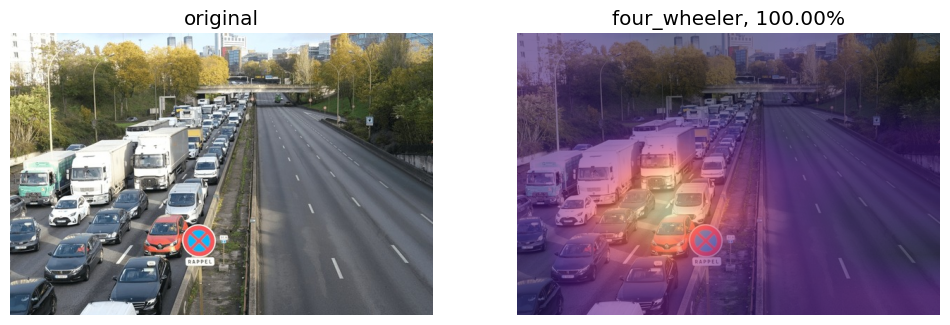

In [24]:
gcam = GradCam(learner, image, None)
gcam.plot(full_size=True, plot_original=True, figsize=(12,6))